In [79]:
# https://github.com/mabdullah412/tweets-sentiment-analysis

In [78]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [81]:
import sklearn
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [85]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# 1. LOAD DATA

In [6]:
df = pd.read_csv('chatgpt1.csv')

In [7]:
df.head(5)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


#### REMOVING PUNCTUATIONS

In [8]:
df['Text'] = df['Text'].str.lower()
df['Text'] = df['Text'].str.replace('[^\w\s]', '')

/var/folders/md/lsnzx3412z58dyh5pdk4xssr0000gn/T/ipykernel_2642/1422680633.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Text'] = df['Text'].str.replace('[^\w\s]', '')


### LENGTH

In [9]:
print('length of data is', len(df))

length of data is 50001


### SHAPE

In [10]:
df.shape

(50001, 20)

### COLUMN DATATYPES

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        50001 non-null  object
 1   Tweet Id        50001 non-null  int64 
 2   Text            50001 non-null  object
 3   Username        50001 non-null  object
 4   Permalink       50001 non-null  object
 5   User            50001 non-null  object
 6   Outlinks        19942 non-null  object
 7   CountLinks      19942 non-null  object
 8   ReplyCount      50001 non-null  int64 
 9   RetweetCount    50001 non-null  int64 
 10  LikeCount       50001 non-null  int64 
 11  QuoteCount      50001 non-null  int64 
 12  ConversationId  50001 non-null  int64 
 13  Language        50001 non-null  object
 14  Source          50001 non-null  object
 15  Media           9502 non-null   object
 16  QuotedTweet     3563 non-null   object
 17  MentionedUsers  17169 non-null  object
 18  hashta

### Rows and columns in the dataset

In [12]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   20
Count of rows in the data is:   50001


### DESCRIBE DATASET

In [13]:
df.describe()

,Tweet Id,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,hastag_counts
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,5.000100e+04,50001.000000
mean,1.617493e+18,0.929141,1.498510,9.696326,0.219536,1.617205e+18,0.783304
std,1.725682e+14,23.251710,46.030058,313.524215,10.356329,1.005075e+16,1.975040
min,1.617156e+18,0.000000,0.000000,0.000000,0.000000,6.493609e+17,0.000000
25%,1.617354e+18,0.000000,0.000000,0.000000,0.000000,1.617302e+18,0.000000
50%,1.617525e+18,0.000000,0.000000,0.000000,0.000000,1.617504e+18,0.000000
75%,1.617625e+18,1.000000,0.000000,2.000000,0.000000,1.617607e+18,1.000000
max,1.617779e+18,3098.000000,6815.000000,56073.000000,1947.000000,1.617779e+18,28.000000


### NULL VALUES COUNT

In [14]:
df.isnull().sum()

Datetime              0
Tweet Id              0
Text                  0
Username              0
Permalink             0
User                  0
Outlinks          30059
CountLinks        30059
ReplyCount            0
RetweetCount          0
LikeCount             0
QuoteCount            0
ConversationId        0
Language              0
Source                0
Media             40499
QuotedTweet       46438
MentionedUsers    32832
hashtag               0
hastag_counts         0
dtype: int64

### GETTING THE MOST FREQUENT VALUES

In [15]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [16]:
most_frequent_values(df)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
Total,50001,50001,50001,50001,50001,50001,19942,19942,50001,50001,50001,50001,50001,50001,50001,9502,3563,17169,50001,50001
Most frequent item,2023-01-23 17:11:13+00:00,1617156270871699456,chatgpt_issac ai,translation_ja,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/translation_ja,['https://www.ft.com/content/7229ba86-142a-49f...,['https://t.co/xegxY3jDom'],0,0,0,0,1617162355112124421,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/GRDecter/status/1617162355...,"[User(username='GRDecter', id=1281457267582177...",[],0
Frequence,8,1,178,60,1,60,149,19,36736,42416,27141,47665,264,32076,17814,20,209,332,36414,36414
Percent from total,0.016,0.002,0.356,0.12,0.002,0.12,0.747,0.095,73.471,84.83,54.281,95.328,0.528,64.151,35.627,0.21,5.866,1.934,72.827,72.827


### PLOT SHOWING NUMBER OF TWEETS BY USERS

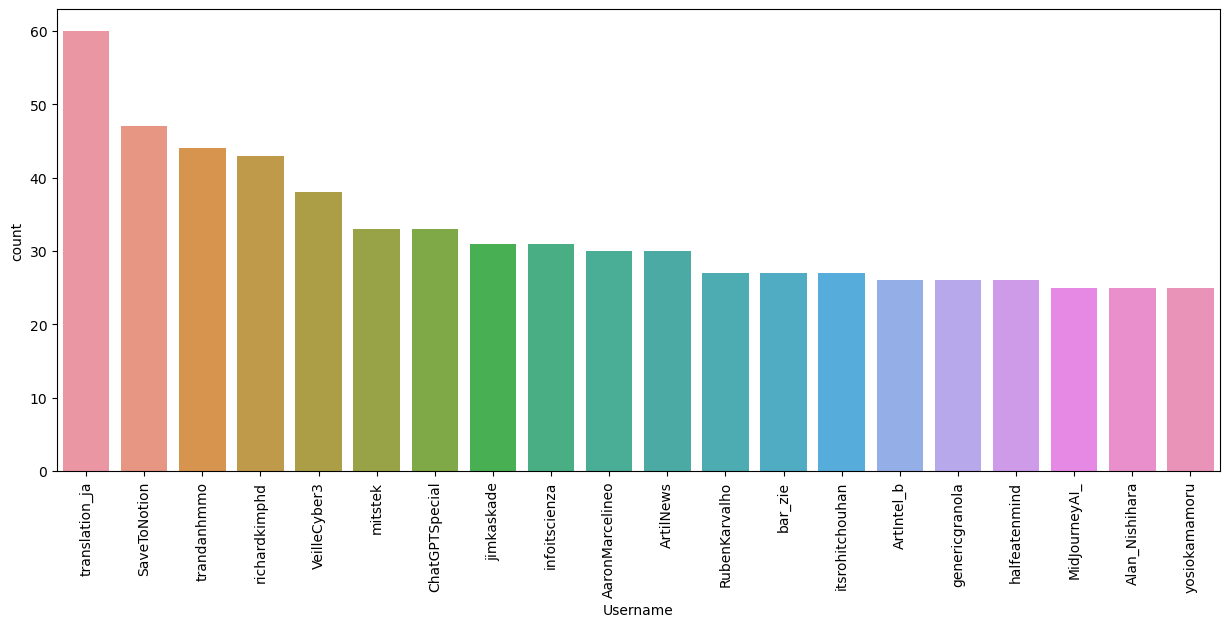

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Username', order=df["Username"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.savefig('tweets-by-user-count')
plt.show()

### PLOTTING THE  LANGUAGE COUNTS

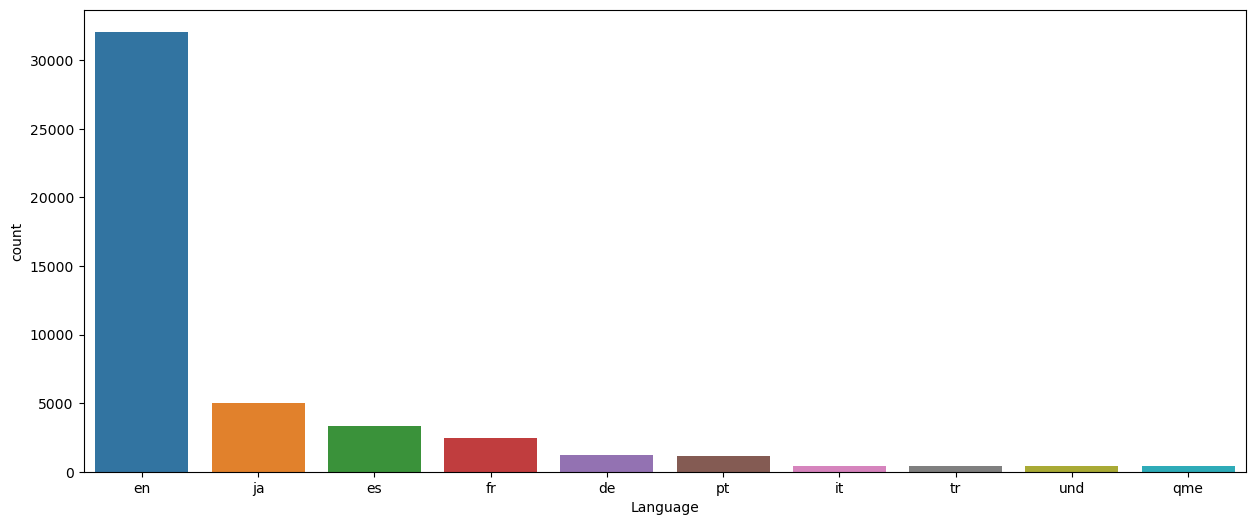

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Language', order=df["Language"].value_counts().index[:10])
plt.savefig('tweet-language-count')
plt.show()

#### Defining set containing all stopwords in English.

In [19]:
stopwords = set(STOPWORDS)

### FUNTION THAT DISPLAYS A WORDCLOUD OF FREQUENT WORDS IN TWEETS

In [20]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.savefig('frequent-words-wordcloud')
    plt.show() 

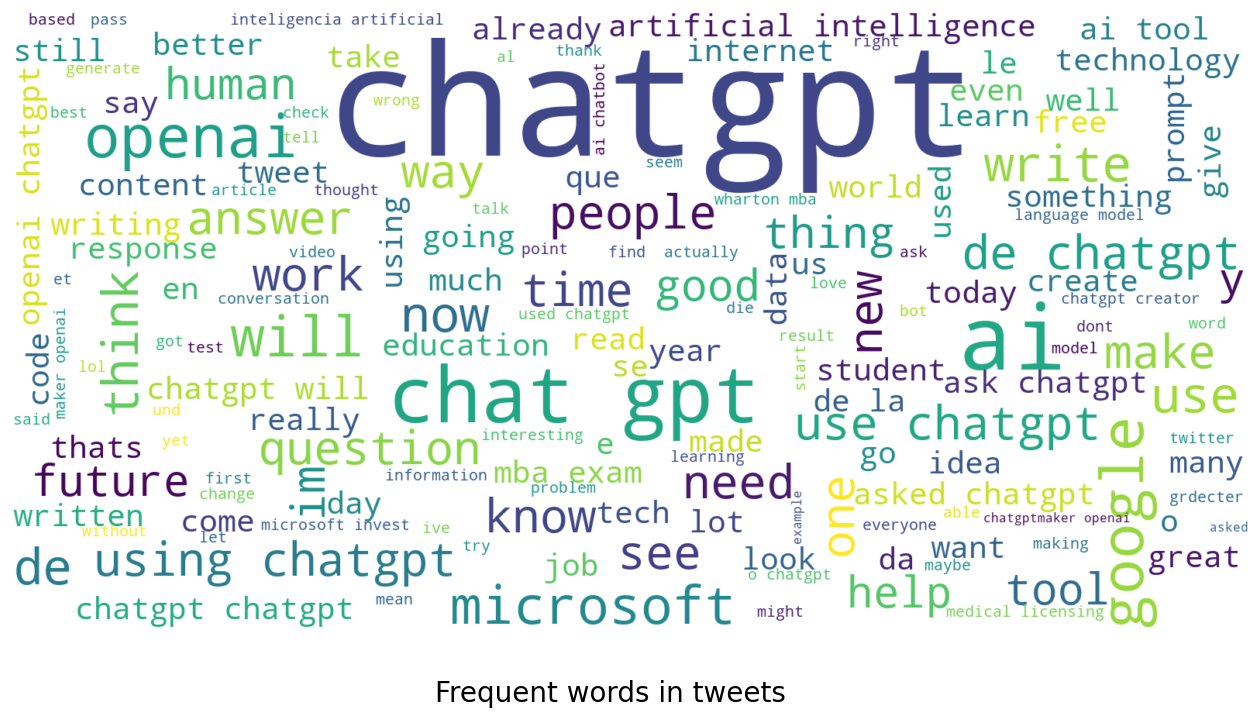

In [21]:
show_wordcloud(df['Text'], title = 'Frequent words in tweets')

### CONVERTING VALUES TO DATETIME DATATYPE

In [22]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [23]:
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['hour'] = df['Datetime'].dt.hour
df['minute'] = df['Datetime'].dt.minute
df['dayofyear'] = df['Datetime'].dt.dayofyear
df['date_only'] = df['Datetime'].dt.date

### NUMBER OF TWEETS AT DIFFERENT TIMES OF THE DAY

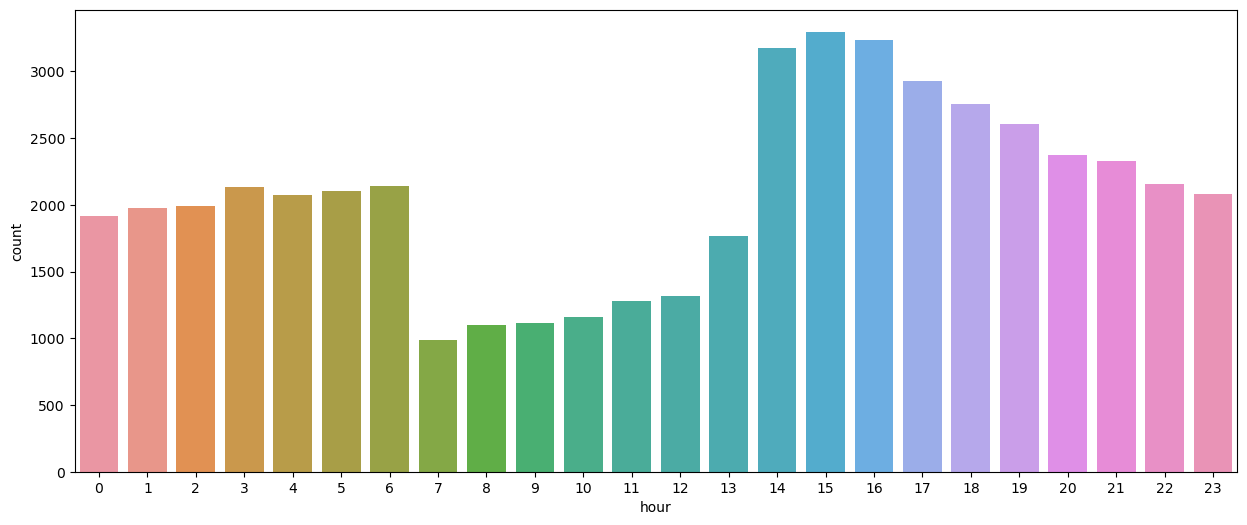

In [24]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='hour')
plt.savefig('tweets-at-diff-times-of-day')
plt.show()

### NUMBER OF HASHTAG ON TWEETS

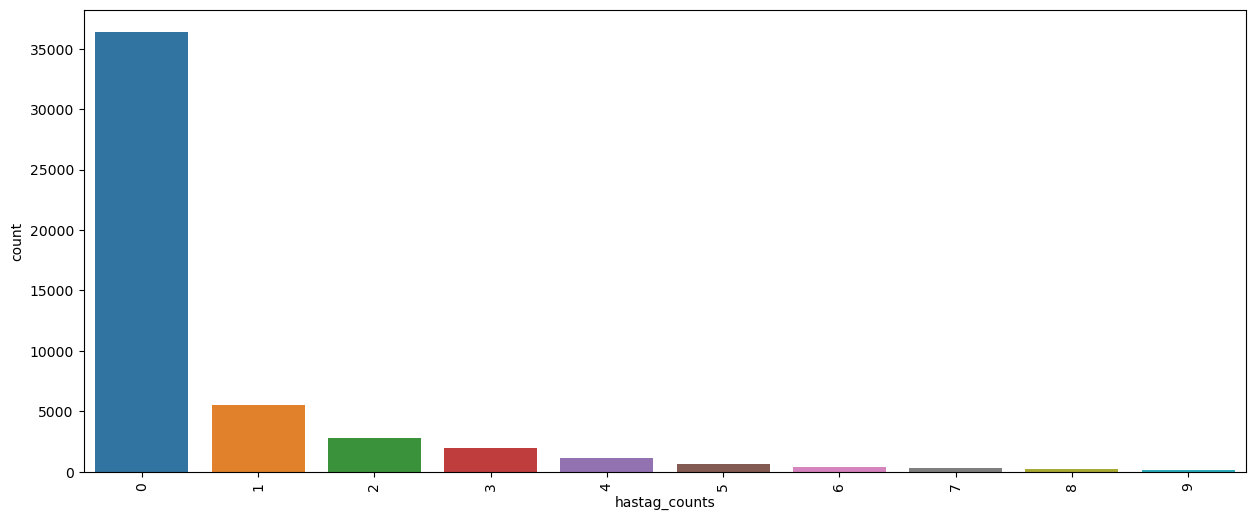

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='hastag_counts', order=df["hastag_counts"].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.savefig('hashtags-on-tweets-count')
plt.show()

### SENTIMENT ANALYSIS

In [26]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [27]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [28]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

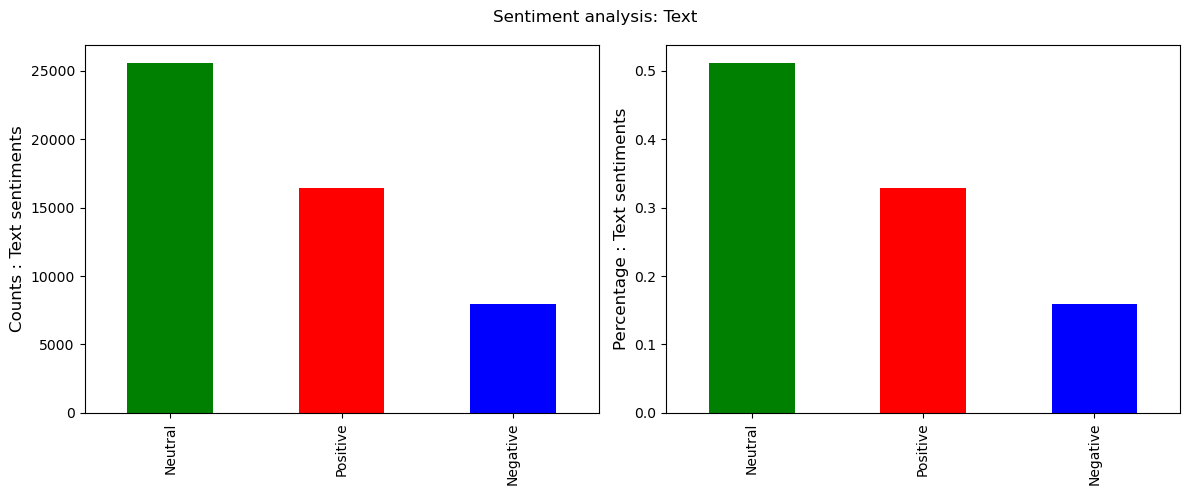

In [29]:
df['text_sentiment'] = df['Text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

# 2  & 3. TRAIN TEST SPLIT

#### PREPROCESSING FOR AI MODEL

In [30]:
df = df[['Text', 'Language']]

In [31]:
df = df.dropna()

In [32]:
X = df['Text']
y = df['Language']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [34]:
print(f'Train size: {X_train.shape}')

Train size: (40000,)


In [35]:
print(f'Test size: {X_test.shape}')

Test size: (10001,)


# 4. VECTORIZING DATA

In [36]:
tfidf = TfidfVectorizer()

In [45]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [46]:
X_train_tfidf.shape

(40000, 110006)

# 5 (1). APPLYING DECISION TREE IN PYTHON

In [40]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train_tfidf, y_train)

In [42]:
#Predict the response for test dataset
y_pred = clf.predict(X_test_tfidf)

In [43]:
y_pred

array(['en', 'ja', 'en', ..., 'ja', 'en', 'en'], dtype=object)

In [44]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8732126787321268


# 5 (2). APPLYING RANDOM FOREST

In [50]:
# Create Random Forest classifer object
rf = RandomForestClassifier()

# Train Random Forest Classifer
rf.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [51]:
#Predict the response for test dataset
y_pred = rf.predict(X_test_tfidf)

In [52]:
y_pred

array(['de', 'ja', 'qme', ..., 'ja', 'en', 'en'], dtype=object)

In [53]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9224077592240776


# 5 (3). APPLYING KNN

In [74]:
# Create KNN classifer object
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=61) 

# Train KNN Classifer
knn.fit(X_train_tfidf, y_train)

KNeighborsClassifier(n_neighbors=61)

In [75]:
#Predict the response for test dataset
y_pred = knn.predict(X_test_tfidf)

/Users/student/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [76]:
y_pred

array(['de', 'en', 'en', ..., 'en', 'en', 'en'], dtype=object)

In [77]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8331166883311669


# 6. K-MEANS CLUSTERING

In [83]:
kmeans = KMeans(n_clusters=3)